In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('/content/fish.csv',header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [9]:
col=['Type','Weight','l1','l2','l3','height','width']

In [10]:
df.columns=col
df.head()

,Type,Weight,l1,l2,l3,height,width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [11]:
x=df[['Weight','l1']]

Kmeans

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_#will calculate with in cluster sum of sqaures
  wcss.append(css)

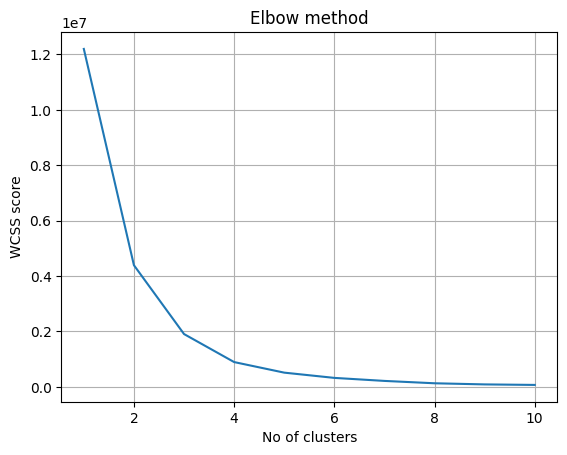

In [14]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS score')
plt.title('Elbow method')
plt.grid()
plt.show()

In [24]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [25]:
cluster_labels=km.predict(x)

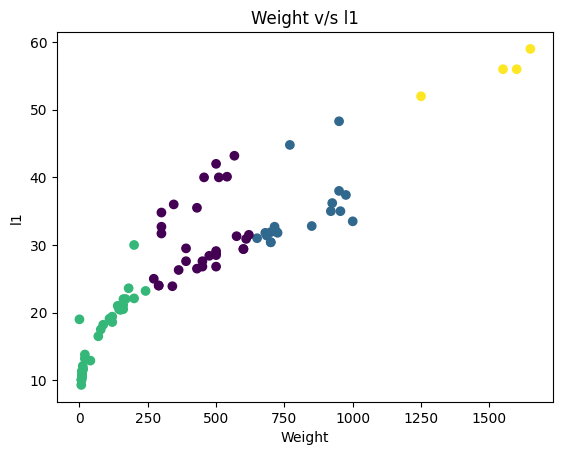

In [26]:
plt.scatter(x['Weight'],x['l1'],c=cluster_labels)
plt.xlabel('Weight')
plt.ylabel('l1')
plt.title('Weight v/s l1')
plt.show()

In [27]:
df['cluster_labels']=cluster_labels

In [28]:
df.head()

,Type,Weight,l1,l2,l3,height,width,cluster_labels
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4,2
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8,0
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1,0
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3,0
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1,0


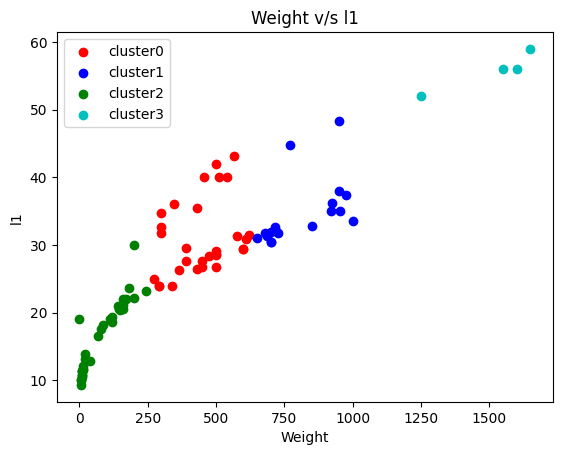

In [32]:
colors=['r','b','g','c']
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Weight'],cluster_data['l1'],c=colors[i],label=f'cluster{i}')
plt.xlabel('Weight')
plt.ylabel('l1')
plt.title('Weight v/s l1')
plt.legend()
plt.show()

In [33]:
#prediction
def predict_cluster(weight,l1):
  new_data=[[weight,l1]]
  cluster=km.predict(new_data)
  return cluster[0]

In [39]:
weight=20
l1=45
c=predict_cluster(weight,l1)
print(f'Fish belongs to :{c}')

Fish belongs to :2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Agglomerative Hierarchial Clustering

In [35]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [36]:
mergings=linkage(x,method='ward')

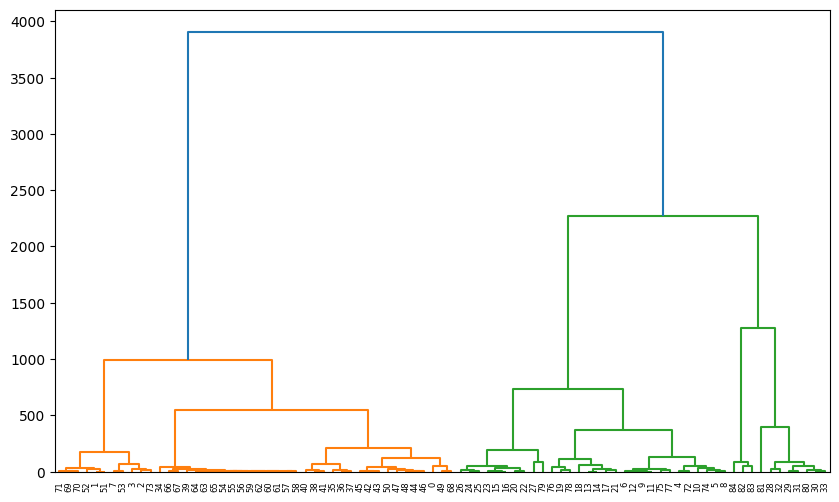

In [37]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [38]:
cluster_label=fcluster(mergings,2500,criterion='distance')

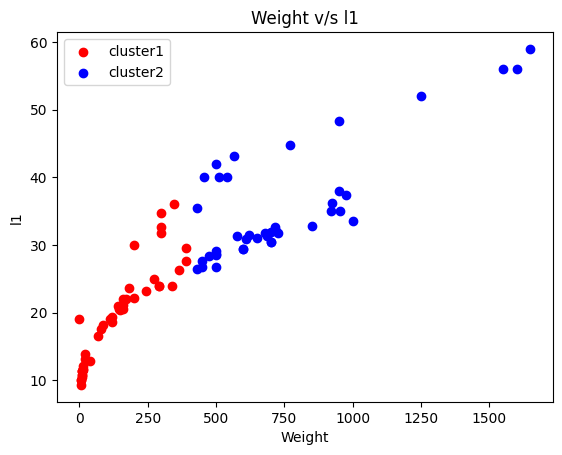

In [40]:
colors=['r','b']
for i in range(1,max(cluster_label+1)):
  cluster_data=x[cluster_label==i]
  plt.scatter(cluster_data['Weight'],cluster_data['l1'],c=colors[i-1],label=f'cluster{i}')
plt.xlabel('Weight')
plt.ylabel('l1')
plt.title('Weight v/s l1')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_label)
print(sil_avg)

0.5838805870259255
